UTS PEMROGRAMAN LANJUT <br>
GELAR PAMBUDI A. / 18117020 <br>
M. TAUFIQ RAFIANDI / 18117035

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_anon = pd.read_csv('D:\Kuliah\Pemrograman Lanjut\pilrek\pilrek-anon.csv')

In [4]:
df_anon["CaRek Pilihan"].value_counts()

Kadarsah Suryadi (FTI-TI)                  322
Tutuka Ariaji (FTTM-TM)                    280
Acep Purqon (FMIPA-FI)                     240
Edy Tri Baskoro (FMIPA-MA)                 209
Khairurrijal (FMIPA-FI)                    129
Dicky Rezady Munaf (FSRD)                  112
Emir Mauludi Husni (STEI)                   96
Sigit Puji Santosa (FTMD)                   93
Deddy Kurniadi (FTI-TF)                     91
Benyamin Sapiie (FITB)                      50
Suhono Harso Supangkat (STEI)               42
Bramantyo (Direktur PPM Manajemen)          42
Dewi Larasati (SAPPK)                       41
Ary Setiaji Prihatmanto (STEI)              32
Bambang Riyanto T (STEI)                    30
Mikrajuddin Abdullah (FMIPA-FI)             28
Satria Bijaksana (FTTM)                     28
Edwan Kardena (FTSL)                        20
Jaka Sembiring (STEI)                       15
Togar M Simatupang (SBM)                    14
Andang Bachtiar (Direktur Aeksplorasi )     14
Dwi Larso (SB

In [5]:
df_anon.tail()

,Timestamp,Kategori Anda,Kategori Umur Anda,CaRek Pilihan,Alasan Memilih CaRek,Harapan Anda
2009,9/16/2019 16:07:41,Alumni,25 - 40 th,Dicky Rezady Munaf (FSRD),Kapabilitas ybs utk memajukan riset dan indust...,Bapak Dicky Rezadi Munaf menjadi Rektor ITB k...
2010,9/16/2019 16:08:51,Alumni,< 25 th,Dicky Rezady Munaf (FSRD),Keberhasilan dan prestasi,Smga bapak bisa lebih membawa ITB lebih di ken...
2011,9/16/2019 16:09:04,Alumni,25 - 40 th,Dicky Rezady Munaf (FSRD),Kecerdasan dan keberanian utk kemajuan ITB,"Bpk Dicky adalah seorang yg bijaksana,pekerja ..."
2012,9/16/2019 17:14:53,Umum,< 25 th,Bramantyo (Direktur PPM Manajemen),Kecerdasan dan keberanian utk kemajuan ITB,NaN
2013,9/17/2019 7:28:30,Dosen,> 40 th,Sigit Puji Santosa (FTMD),"Intelektualitasnya luar biasa; rendah hati, na...",ITB mendapatkan Rektor seperti di atas untuk d...


In [6]:
date_rng = ["2019-09-01", "2019-09-02", "2019-09-03", "2019-09-04" , "2019-09-05",
           "2019-09-06", "2019-09-07", "2019-09-08", "2019-09-09" , "2019-09-10",
           "2019-09-11", "2019-09-12", "2019-09-13", "2019-09-14" , "2019-09-15",
           "2019-09-16", "2019-09-17"]
df_anon['Timestamp'] = pd.to_datetime(df_anon['Timestamp'])
df_anon['dates'] = df_anon['Timestamp'].dt.date

In [8]:
kadarsah = []
acep = []
edy = []
kadarsah_exists = False
acep_exists = False
edy_exists = False
for i in date_rng:
    time = df_anon.groupby("dates").get_group(i)
    for name in time["CaRek Pilihan"]:
        if name != "Kadarsah Suryadi (FTI-TI)":
            kadarsah_exists = False
        else:
            kadarsah_exists = True
            break           
    if kadarsah_exists:
        kadarsah.append(time.groupby("CaRek Pilihan").get_group("Kadarsah Suryadi (FTI-TI)")["CaRek Pilihan"].count())
    else :
        kadarsah.append(0)
    
    
    for name in time["CaRek Pilihan"]:
        if name != "Acep Purqon (FMIPA-FI)":
            acep_exists = False
        else:
            acep_exists = True
            break         
    if acep_exists:
        acep.append(time.groupby("CaRek Pilihan").get_group("Acep Purqon (FMIPA-FI)")["CaRek Pilihan"].count())
    else:
        acep.append(0)
        
        
    for name in time["CaRek Pilihan"]:
        if name != "Edy Tri Baskoro (FMIPA-MA)":
            edy_exists = False
        else:
            edy_exists = True
            break
    if edy_exists:
        edy.append(time.groupby("CaRek Pilihan").get_group("Edy Tri Baskoro (FMIPA-MA)")["CaRek Pilihan"].count())
    else :
        edy.append(0)

In [9]:
new_kadarsah = []
new_acep = []
new_edy = []
value1 = 0
value2 = 0
value3 = 0

for i in range(0,len(date_rng)):
    value1 = value1 + kadarsah[i]
    value2 = value2 + acep[i]
    value3 = value3 + edy[i]
    new_kadarsah.append(value1)
    new_acep.append(value2)
    new_edy.append(value3)

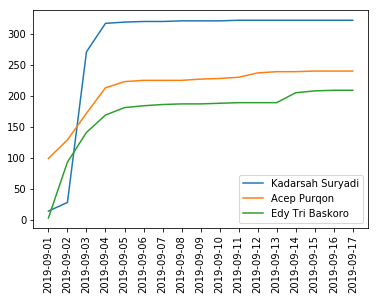

In [10]:
plt.xticks(rotation=90)
plt.plot(date_rng, new_kadarsah, label = "Kadarsah Suryadi")
plt.plot(date_rng, new_acep, label = "Acep Purqon")
plt.plot(date_rng, new_edy, label = "Edy Tri Baskoro")
plt.legend()
plt.show()

In [11]:
carek = {'Kadarsah Suryadi' : new_kadarsah, 'Acep Purqon' : new_acep, 'Edy Tri Baskoro' : new_edy}
df_carek = pd.DataFrame(carek, index = date_rng)
df_carek

,Acep Purqon,Edy Tri Baskoro,Kadarsah Suryadi
2019-09-01,99,3,14
2019-09-02,129,93,28
2019-09-03,172,141,271
2019-09-04,213,169,317
2019-09-05,223,181,319
2019-09-06,225,184,320
2019-09-07,225,186,320
2019-09-08,225,187,321
2019-09-09,227,187,321
2019-09-10,228,188,321


D:\Anaconda3\envs\mentoring_rm_3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


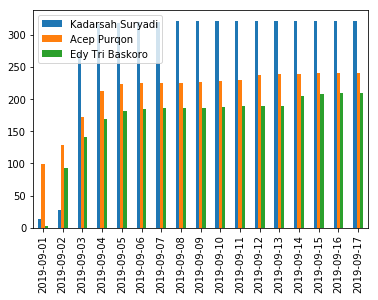

In [12]:
df_carek.plot(kind = 'bar', y = ['Kadarsah Suryadi', 'Acep Purqon', 'Edy Tri Baskoro'])

In [20]:
df_umur25 = df_anon.groupby("Kategori Umur Anda").get_group("25 - 40 th")
df_alasan_kadarsah = df_umur25.groupby("CaRek Pilihan").get_group("Kadarsah Suryadi (FTI-TI)")["Alasan Memilih CaRek"].value_counts()
df_alasan_kadarsah

Keberhasilan dan prestasi                                                 27
Program ybs utk peningkatan income dan kesejahteraan dosen / pegawai      17
Kapabilitas ybs utk meningkatkan ranking ITB                              15
Sesuai dengan kriteria kekinian (Rektor 4.0)                              13
Kecerdasan dan keberanian utk kemajuan ITB                                 7
Kapabilitas ybs utk memajukan riset dan industri RI                        7
Muda dan berenergi                                                         6
Karakter kepemimpinan dan leadership                                       6
Akhlak dan budi pekerti                                                    5
Emansipasi, kesetaraan dan kebhinekaan                                     1
Mendatangkan dana riset dan kerjasama eksternal, dalam dan luar negeri     1
Name: Alasan Memilih CaRek, dtype: int64

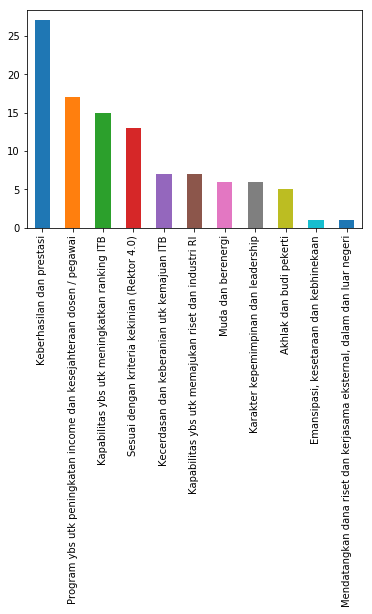

In [19]:
df_alasan_kadarsah.plot(kind = "bar")